In [11]:
from tensorflow.keras.datasets import boston_housing

In [12]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [13]:
train_targets = train_labels
test_targets = test_labels

In [14]:
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

In [15]:
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [16]:
from tensorflow.keras import models, layers

In [17]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


#### K-fold cross validation 

In [20]:
import numpy as np
k = 4
validation_count = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("Processing Fold", i)
    validation_start, validation_end = i * validation_count, (i + 1) * validation_count
    validation_data = train_data[ validation_start: validation_end ]
    validation_targets = train_targets[ validation_start: validation_end ]
    
    batch_data = np.concatenate([train_data[: validation_start ], train_data[validation_end:]], axis = 0)
    batch_targets = np.concatenate([train_targets[:validation_start], train_targets[validation_end:]], axis = 0)
    
    model = build_model()
    model.fit(batch_data, batch_targets, epochs=num_epochs, batch_size = 1, verbose = 0)
    mse, mae = model.evaluate(validation_data, validation_targets, verbose = 0)
    all_scores.append(mae)
    
    

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3


In [21]:
all_scores


[1.8991197347640991, 2.364783525466919, 2.7404367923736572, 2.5805718898773193]

In [24]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("Processing Fold", i)
    validation_start, validation_end = i * validation_count, (i + 1) * validation_count
    validation_data = train_data[ validation_start: validation_end ]
    validation_targets = train_targets[ validation_start: validation_end ]
    
    batch_data = np.concatenate([train_data[: validation_start ], train_data[validation_end:]], axis = 0)
    batch_targets = np.concatenate([train_targets[:validation_start], train_targets[validation_end:]], axis = 0)
    
    model = build_model()
    history = model.fit(batch_data, batch_targets, validation_data=(validation_data, validation_targets), epochs=num_epochs, batch_size = 1, verbose = 0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3


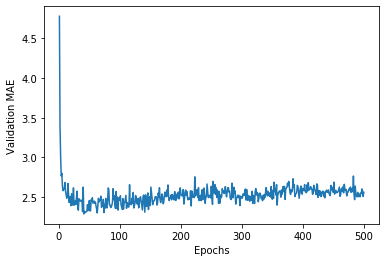

In [27]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

import matplotlib.pyplot as plt
plt.plot(range(1,1+ len(average_mae_history)), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


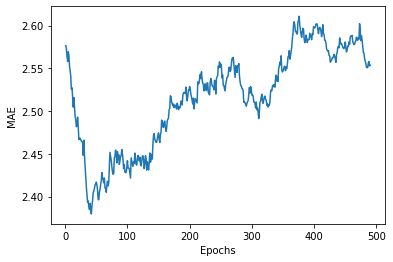

In [29]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if not smoothed_points:
            smoothed_points.append(point)
        else:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16)